# Phishing URL Detection

The Internet has become an indispensable part of
our life, However, It also has provided opportunities to anonymously perform malicious activities like Phishing. Phishers try to deceive their victims by social engineering or creating mockup websites to steal information such as account ID, username, password from individuals and organizations. Although many methods have been proposed to detect phishing websites, Phishers have evolved their methods to escape from these detection methods. One of the most successful methods for detecting these malicious activities is Machine Learning. This is because most Phishing attacks have some common characteristics which can be identified by machine learning methods.

The steps are as follows:

1. Loading the data
2. Familiarizing with data & EDA
3. Visualizing the data
4. Splitting the data
5. Training the data
6. Comparision of Model
7. Conclusion

In [1]:
#importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

## 1. Loading Data:

The dataset is borrowed from Kaggle, https://www.kaggle.com/eswarchandt/phishing-website-detector .

A collection of website URLs for 11000+ websites. Each sample has 32 website parameters and a class label identifying it as a phishing website or not (1 or -1).

In [2]:
#Loading data into dataframe

data = pd.read_csv("/content/phishing.csv")
data.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


## 2. Familiarizing with Data & EDA:
In this step, few dataframe methods are used to look into the data and its features.

In [3]:
#Shape of dataframe

data.shape

(11054, 32)

In [4]:
#Listing the features of the dataset

data.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [5]:
#Information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                11054 non-null  int64
 1   UsingIP              11054 non-null  int64
 2   LongURL              11054 non-null  int64
 3   ShortURL             11054 non-null  int64
 4   Symbol@              11054 non-null  int64
 5   Redirecting//        11054 non-null  int64
 6   PrefixSuffix-        11054 non-null  int64
 7   SubDomains           11054 non-null  int64
 8   HTTPS                11054 non-null  int64
 9   DomainRegLen         11054 non-null  int64
 10  Favicon              11054 non-null  int64
 11  NonStdPort           11054 non-null  int64
 12  HTTPSDomainURL       11054 non-null  int64
 13  RequestURL           11054 non-null  int64
 14  AnchorURL            11054 non-null  int64
 15  LinksInScriptTags    11054 non-null  int64
 16  ServerFormHandler    1

In [6]:
# nunique value in columns

data.nunique()

Index                  11054
UsingIP                    2
LongURL                    3
ShortURL                   2
Symbol@                    2
Redirecting//              2
PrefixSuffix-              2
SubDomains                 3
HTTPS                      3
DomainRegLen               2
Favicon                    2
NonStdPort                 2
HTTPSDomainURL             2
RequestURL                 2
AnchorURL                  3
LinksInScriptTags          3
ServerFormHandler          3
InfoEmail                  2
AbnormalURL                2
WebsiteForwarding          2
StatusBarCust              2
DisableRightClick          2
UsingPopupWindow           2
IframeRedirection          2
AgeofDomain                2
DNSRecording               2
WebsiteTraffic             3
PageRank                   2
GoogleIndex                2
LinksPointingToPage        3
StatsReport                2
class                      2
dtype: int64

In [7]:
#dropping index column

data = data.drop(['Index'],axis = 1)

In [8]:
#description of dataset

data.describe().T

,count,mean,std,min,25%,50%,75%,max
UsingIP,11054.0,0.313914,0.949495,-1.0,-1.0,1.0,1.0,1.0
LongURL,11054.0,-0.633345,0.765973,-1.0,-1.0,-1.0,-1.0,1.0
ShortURL,11054.0,0.738737,0.674024,-1.0,1.0,1.0,1.0,1.0
Symbol@,11054.0,0.700561,0.713625,-1.0,1.0,1.0,1.0,1.0
Redirecting//,11054.0,0.741632,0.670837,-1.0,1.0,1.0,1.0,1.0
PrefixSuffix-,11054.0,-0.734938,0.678165,-1.0,-1.0,-1.0,-1.0,1.0
SubDomains,11054.0,0.064049,0.817492,-1.0,-1.0,0.0,1.0,1.0
HTTPS,11054.0,0.251040,0.911856,-1.0,-1.0,1.0,1.0,1.0
DomainRegLen,11054.0,-0.336711,0.941651,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11054.0,0.628551,0.777804,-1.0,1.0,1.0,1.0,1.0


data_set.append(9 OBSERVATIONS):
1. There are 11054 instances and 31 features in dataset.
2. Out of which 30 are independent features where as 1 is dependent feature.
3. Each feature is in int datatype, so there is no need to use LabelEncoder.
4. There is no outlier present in dataset.
5. There are no missing value in dataset.

## 3. Visualizing the data:
Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

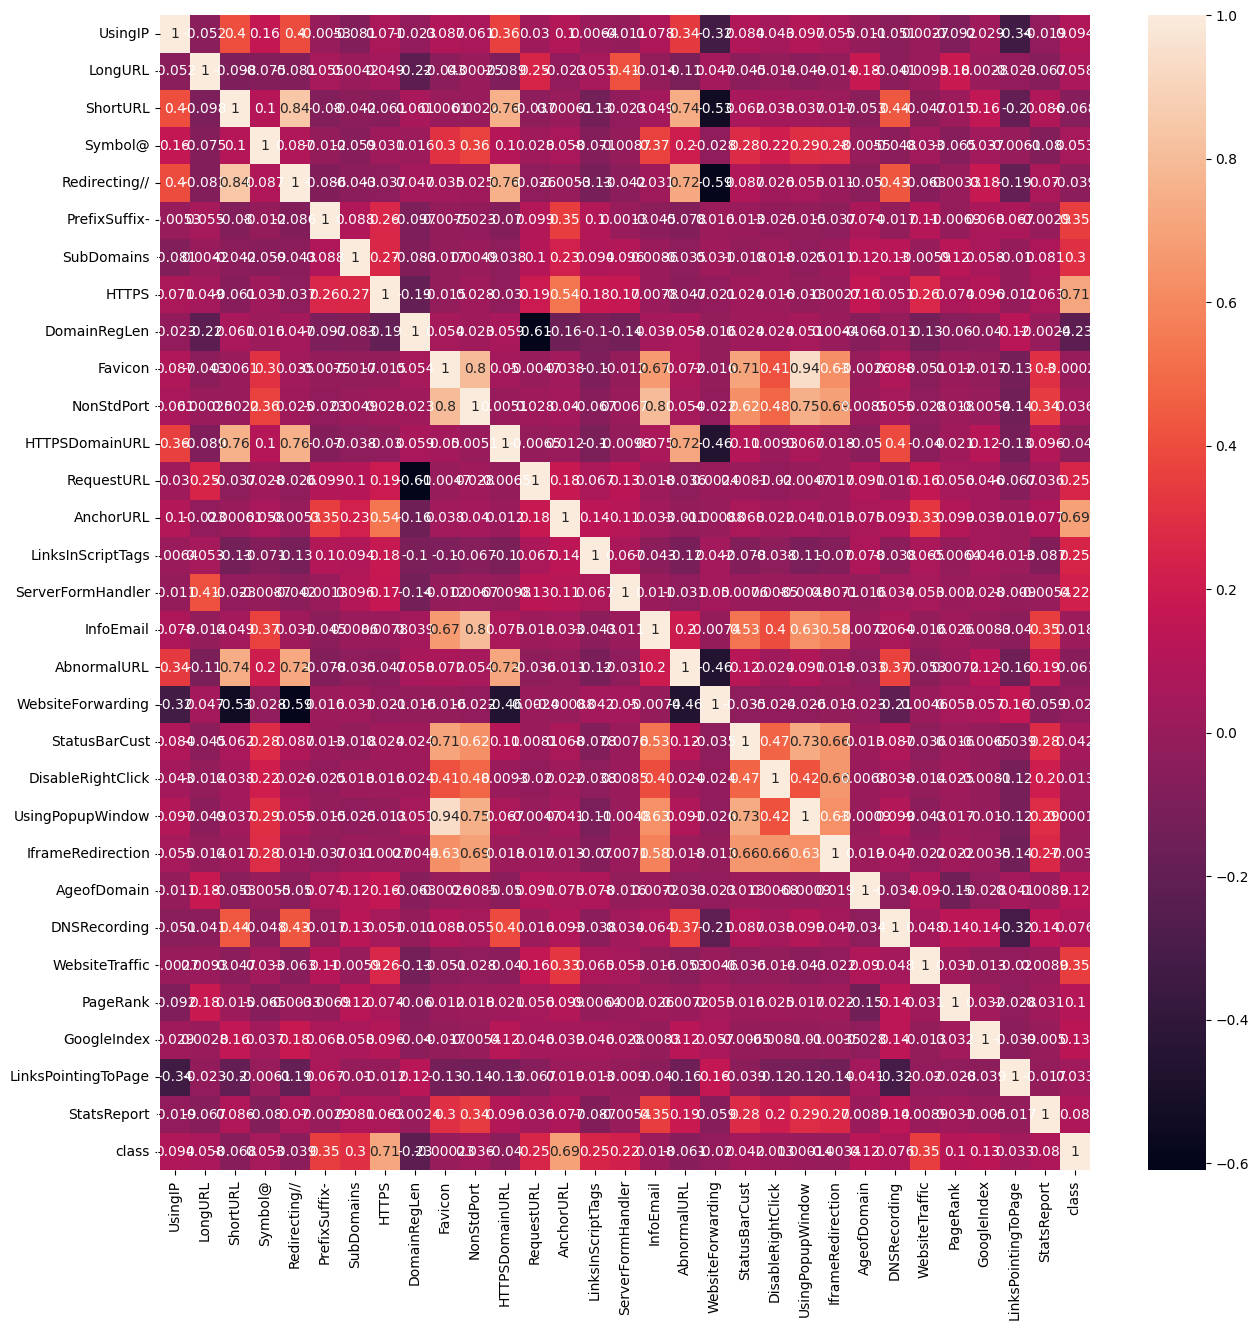

In [9]:
#Correlation heatmap

plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True)
plt.show()

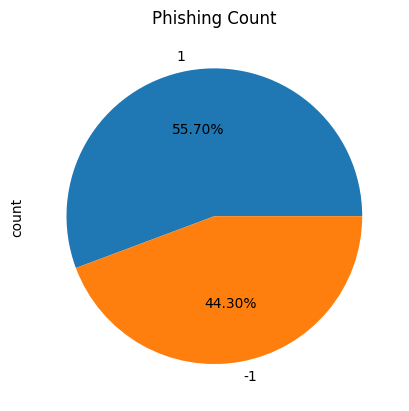

In [10]:
# Phishing Count in pie chart

data['class'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

## 4. Splitting the Data:
The data is split into train & test sets, 80-20 split.

In [11]:
# Splitting the dataset into dependant and independant fetature

X = data.drop(["class"],axis =1)
y = data["class"]

In [12]:
# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8843, 30), (8843,), (2211, 30), (2211,))

## 5. Model Building & Training:
   Supervised machine learning is one of the most commonly used and successful types of machine learning. Supervised learning is used whenever we want to predict a certain outcome/label from a given set of features, and we have examples of features-label pairs. We build a machine learning model from these features-label pairs, which comprise our training set. Our goal is to make accurate predictions for new, never-before-seen data.

   There are two major types of supervised machine learning problems, called classification and regression. Our data set comes under regression problem, as the prediction of suicide rate is a continuous number, or a floating-point number in programming terms. The supervised machine learning models (regression) considered to train the dataset in this notebook are:

1. Logistic Regression
2. k-Nearest Neighbors
3. Support Vector Clasifier
4. Naive Bayes
5. Decision Tree
6. Random Forest
7. Gradient Boosting
8. Catboost
9. Multilayer Perceptrons

              
  The metrics considered to evaluate the model performance are Accuracy , Precison , Recall , F1 score and AUC curve.

In [13]:
# Creating holders to store the model performance results
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  accuracy.append(round(a, 3))
  f1_score.append(round(b, 3))
  recall.append(round(c, 3))
  precision.append(round(d, 3))

## 5.1. Logistic Regression

Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.

In [14]:
# Linear regression model
from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import Pipeline

# instantiate the model
log = LogisticRegression()

# fit the model
log.fit(X_train,y_train)

LogisticRegression()

In [15]:
#predicting the target value from the model for the samples

y_train_log = log.predict(X_train)
y_test_log = log.predict(X_test)

In [16]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_log = metrics.accuracy_score(y_train,y_train_log)
acc_test_log = metrics.accuracy_score(y_test,y_test_log)
print("Logistic Regression : Accuracy on training Data: {:.3f}".format(acc_train_log))
print("Logistic Regression : Accuracy on test Data: {:.3f}".format(acc_test_log))
print()

f1_score_train_log = metrics.f1_score(y_train,y_train_log)
f1_score_test_log = metrics.f1_score(y_test,y_test_log)
print("Logistic Regression : f1_score on training Data: {:.3f}".format(f1_score_train_log))
print("Logistic Regression : f1_score on test Data: {:.3f}".format(f1_score_test_log))
print()

recall_score_train_log = metrics.recall_score(y_train,y_train_log)
recall_score_test_log = metrics.recall_score(y_test,y_test_log)
print("Logistic Regression : Recall on training Data: {:.3f}".format(recall_score_train_log))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_log))
print()

precision_score_train_log = metrics.precision_score(y_train,y_train_log)
precision_score_test_log = metrics.precision_score(y_test,y_test_log)
print("Logistic Regression : precision on training Data: {:.3f}".format(precision_score_train_log))
print("Logistic Regression : precision on test Data: {:.3f}".format(precision_score_test_log))

Logistic Regression : Accuracy on training Data: 0.927
Logistic Regression : Accuracy on test Data: 0.934

Logistic Regression : f1_score on training Data: 0.935
Logistic Regression : f1_score on test Data: 0.941

Logistic Regression : Recall on training Data: 0.943
Logistic Regression : Recall on test Data: 0.953

Logistic Regression : precision on training Data: 0.927
Logistic Regression : precision on test Data: 0.930


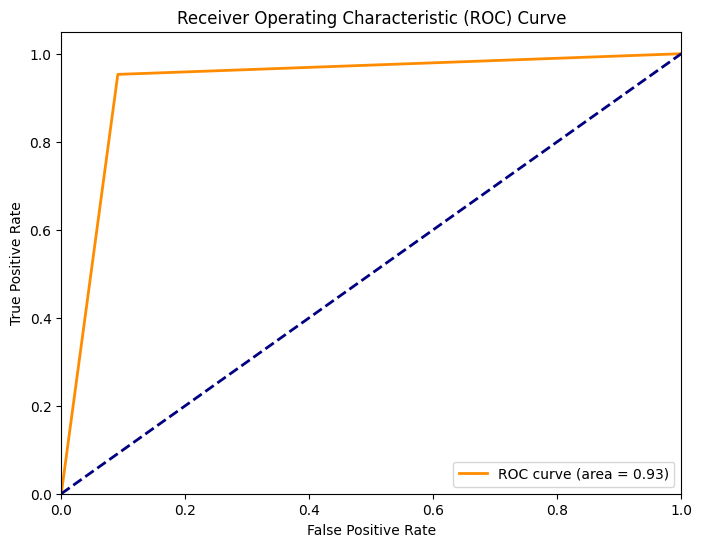

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_test_log)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [18]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_log))

              precision    recall  f1-score   support

          -1       0.94      0.91      0.92       976
           1       0.93      0.95      0.94      1235

    accuracy                           0.93      2211
   macro avg       0.93      0.93      0.93      2211
weighted avg       0.93      0.93      0.93      2211



In [19]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Logistic Regression',acc_test_log,f1_score_test_log,
             recall_score_train_log,precision_score_train_log)

## 5.2. K-Nearest Neighbors : Classifier

K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique. K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.

In [20]:
# K-Nearest Neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=1)

# fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [21]:
#predicting the target value from the model for the samples
y_train_knn = knn.predict(X_train)
y_test_knn = knn.predict(X_test)

In [22]:
#computing the accuracy,f1_score,Recall,precision of the model performance

acc_train_knn = metrics.accuracy_score(y_train,y_train_knn)
acc_test_knn = metrics.accuracy_score(y_test,y_test_knn)
print("K-Nearest Neighbors : Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("K-Nearest Neighbors : Accuracy on test Data: {:.3f}".format(acc_test_knn))
print()

f1_score_train_knn = metrics.f1_score(y_train,y_train_knn)
f1_score_test_knn = metrics.f1_score(y_test,y_test_knn)
print("K-Nearest Neighbors : f1_score on training Data: {:.3f}".format(f1_score_train_knn))
print("K-Nearest Neighbors : f1_score on test Data: {:.3f}".format(f1_score_test_knn))
print()

recall_score_train_knn = metrics.recall_score(y_train,y_train_knn)
recall_score_test_knn = metrics.recall_score(y_test,y_test_knn)
print("K-Nearest Neighborsn : Recall on training Data: {:.3f}".format(recall_score_train_knn))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_knn))
print()

precision_score_train_knn = metrics.precision_score(y_train,y_train_knn)
precision_score_test_knn = metrics.precision_score(y_test,y_test_knn)
print("K-Nearest Neighbors : precision on training Data: {:.3f}".format(precision_score_train_knn))
print("K-Nearest Neighbors : precision on test Data: {:.3f}".format(precision_score_test_knn))

K-Nearest Neighbors : Accuracy on training Data: 0.989
K-Nearest Neighbors : Accuracy on test Data: 0.956

K-Nearest Neighbors : f1_score on training Data: 0.990
K-Nearest Neighbors : f1_score on test Data: 0.961

K-Nearest Neighborsn : Recall on training Data: 0.991
Logistic Regression : Recall on test Data: 0.962

K-Nearest Neighbors : precision on training Data: 0.989
K-Nearest Neighbors : precision on test Data: 0.960


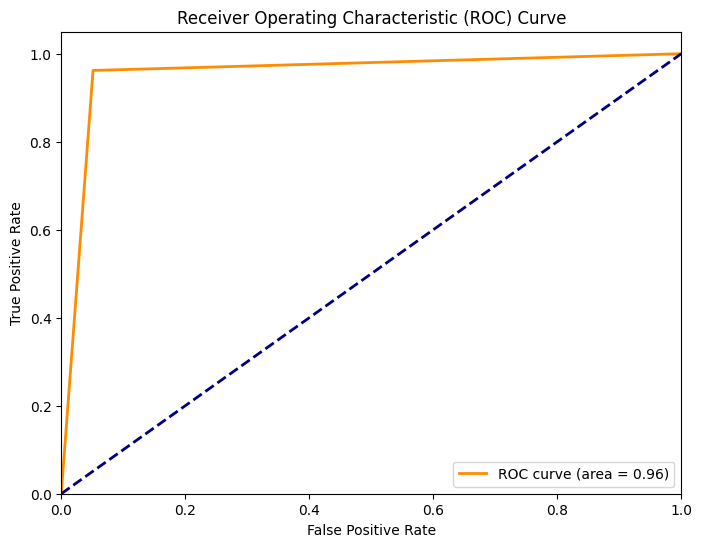

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_test_knn)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [24]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_knn))

              precision    recall  f1-score   support

          -1       0.95      0.95      0.95       976
           1       0.96      0.96      0.96      1235

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



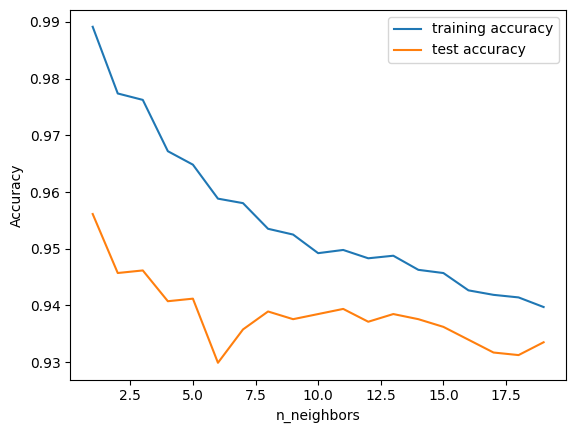

In [25]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    knn = KNeighborsClassifier(n_neighbors=n)

    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))


#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend();

In [26]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('K-Nearest Neighbors',acc_test_knn,f1_score_test_knn,
             recall_score_train_knn,precision_score_train_knn)

## 5.3. Support Vector Machine : Classifier

Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future.

Gamma (gamma):

Gamma is a parameter for non-linear hyperplanes.
The higher the value of gamma, the more influence a single training example has. It defines how far the influence of a single training example reaches.
Low values mean that the influence is 'far', and high values mean that the influence is 'close'. In other words, a low value of gamma will create a broader decision boundary, while a high value will create a more complex decision boundary that fits the training data more closely.
If gamma is too high, the model may overfit the training data, and if it's too low, it may underfit.
Kernel (kernel):

The kernel specifies the type of hyperplane used to separate the data.
Common choices for the kernel are 'linear', 'rbf' (Radial basis function), 'poly' (polynomial), and 'sigmoid'.
The choice of the kernel determines the shape of the decision boundary:
'linear': Linear decision boundary.
'rbf' (Radial basis function): Non-linear decision boundary. It is often a good choice when the data is not linearly separable.
'poly' (Polynomial): Non-linear decision boundary with a polynomial function.
'sigmoid': S-shaped decision boundary.

In [27]:
# Support Vector Classifier model
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'gamma': [0.1],'kernel': ['rbf','linear']}

svc = GridSearchCV(SVC(), param_grid)

# fitting the model for grid search
svc.fit(X_train, y_train)


GridSearchCV(estimator=SVC(),
             param_grid={'gamma': [0.1], 'kernel': ['rbf', 'linear']})

In [28]:
#predicting the target value from the model for the samples
y_train_svc = svc.predict(X_train)
y_test_svc = svc.predict(X_test)

In [29]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_svc = metrics.accuracy_score(y_train,y_train_svc)
acc_test_svc = metrics.accuracy_score(y_test,y_test_svc)
print("Support Vector Machine : Accuracy on training Data: {:.3f}".format(acc_train_svc))
print("Support Vector Machine : Accuracy on test Data: {:.3f}".format(acc_test_svc))
print()

f1_score_train_svc = metrics.f1_score(y_train,y_train_svc)
f1_score_test_svc = metrics.f1_score(y_test,y_test_svc)
print("Support Vector Machine : f1_score on training Data: {:.3f}".format(f1_score_train_svc))
print("Support Vector Machine : f1_score on test Data: {:.3f}".format(f1_score_test_svc))
print()

recall_score_train_svc = metrics.recall_score(y_train,y_train_svc)
recall_score_test_svc = metrics.recall_score(y_test,y_test_svc)
print("Support Vector Machine : Recall on training Data: {:.3f}".format(recall_score_train_svc))
print("Support Vector Machine : Recall on test Data: {:.3f}".format(recall_score_test_svc))
print()

precision_score_train_svc = metrics.precision_score(y_train,y_train_svc)
precision_score_test_svc = metrics.precision_score(y_test,y_test_svc)
print("Support Vector Machine : precision on training Data: {:.3f}".format(precision_score_train_svc))
print("Support Vector Machine : precision on test Data: {:.3f}".format(precision_score_test_svc))

Support Vector Machine : Accuracy on training Data: 0.969
Support Vector Machine : Accuracy on test Data: 0.964

Support Vector Machine : f1_score on training Data: 0.973
Support Vector Machine : f1_score on test Data: 0.968

Support Vector Machine : Recall on training Data: 0.980
Support Vector Machine : Recall on test Data: 0.980

Support Vector Machine : precision on training Data: 0.965
Support Vector Machine : precision on test Data: 0.957


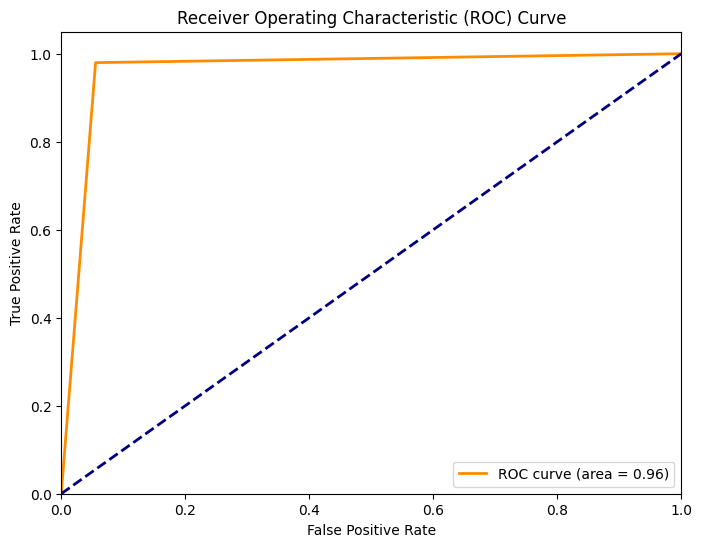

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_test_svc)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [31]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_svc))

              precision    recall  f1-score   support

          -1       0.97      0.94      0.96       976
           1       0.96      0.98      0.97      1235

    accuracy                           0.96      2211
   macro avg       0.97      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



In [32]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Support Vector Machine',acc_test_svc,f1_score_test_svc,
             recall_score_train_svc,precision_score_train_svc)

## 5.4. Naive Bayes : Classifier

Naïve Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems.It is mainly used in text, image classification that includes a high-dimensional training dataset. Naïve Bayes Classifier is one of the simple and most effective Classification algorithms which helps in building the fast machine learning models that can make quick predictions.

In [33]:
# Naive Bayes Classifier Model
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

# instantiate the model
nb=  GaussianNB()

# fit the model
nb.fit(X_train,y_train)

GaussianNB()

In [34]:
#predicting the target value from the model for the samples
y_train_nb = nb.predict(X_train)
y_test_nb = nb.predict(X_test)

In [35]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_nb = metrics.accuracy_score(y_train,y_train_nb)
acc_test_nb = metrics.accuracy_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Accuracy on training Data: {:.3f}".format(acc_train_nb))
print("Naive Bayes Classifier : Accuracy on test Data: {:.3f}".format(acc_test_nb))
print()

f1_score_train_nb = metrics.f1_score(y_train,y_train_nb)
f1_score_test_nb = metrics.f1_score(y_test,y_test_nb)
print("Naive Bayes Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_nb))
print("Naive Bayes Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_nb))
print()

recall_score_train_nb = metrics.recall_score(y_train,y_train_nb)
recall_score_test_nb = metrics.recall_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Recall on training Data: {:.3f}".format(recall_score_train_nb))
print("Naive Bayes Classifier : Recall on test Data: {:.3f}".format(recall_score_test_nb))
print()

precision_score_train_nb = metrics.precision_score(y_train,y_train_nb)
precision_score_test_nb = metrics.precision_score(y_test,y_test_nb)
print("Naive Bayes Classifier : precision on training Data: {:.3f}".format(precision_score_train_nb))
print("Naive Bayes Classifier : precision on test Data: {:.3f}".format(precision_score_test_nb))

Naive Bayes Classifier : Accuracy on training Data: 0.605
Naive Bayes Classifier : Accuracy on test Data: 0.605

Naive Bayes Classifier : f1_score on training Data: 0.451
Naive Bayes Classifier : f1_score on test Data: 0.454

Naive Bayes Classifier : Recall on training Data: 0.292
Naive Bayes Classifier : Recall on test Data: 0.294

Naive Bayes Classifier : precision on training Data: 0.997
Naive Bayes Classifier : precision on test Data: 0.995


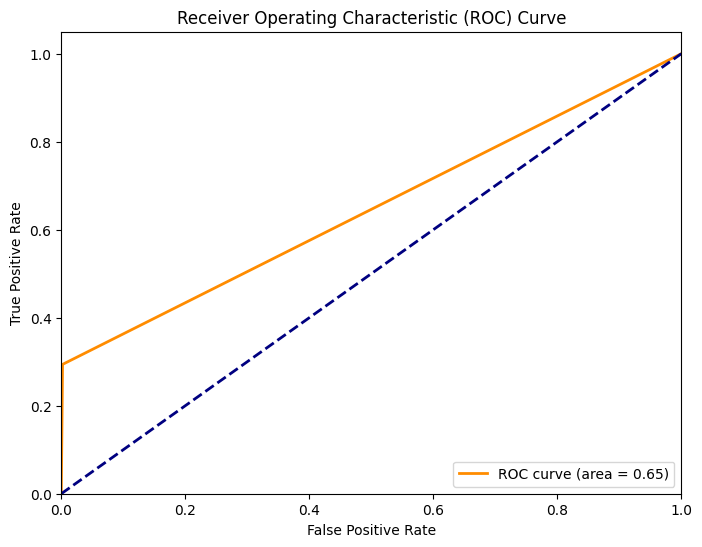

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_test_nb)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [37]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_svc))

              precision    recall  f1-score   support

          -1       0.97      0.94      0.96       976
           1       0.96      0.98      0.97      1235

    accuracy                           0.96      2211
   macro avg       0.97      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



In [38]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Naive Bayes Classifier',acc_test_nb,f1_score_test_nb,
             recall_score_train_nb,precision_score_train_nb)

## 5.5. Decision Trees : Classifier

Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In [39]:
# Decision Tree Classifier model
from sklearn.tree import DecisionTreeClassifier

# instantiate the model
tree = DecisionTreeClassifier(max_depth=30)

# fit the model
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30)

In [40]:
#predicting the target value from the model for the samples

y_train_tree = tree.predict(X_train)
y_test_tree = tree.predict(X_test)

In [41]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_tree = metrics.accuracy_score(y_train,y_train_tree)
acc_test_tree = metrics.accuracy_score(y_test,y_test_tree)
print("Decision Tree : Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree : Accuracy on test Data: {:.3f}".format(acc_test_tree))
print()

f1_score_train_tree = metrics.f1_score(y_train,y_train_tree)
f1_score_test_tree = metrics.f1_score(y_test,y_test_tree)
print("Decision Tree : f1_score on training Data: {:.3f}".format(f1_score_train_tree))
print("Decision Tree : f1_score on test Data: {:.3f}".format(f1_score_test_tree))
print()

recall_score_train_tree = metrics.recall_score(y_train,y_train_tree)
recall_score_test_tree = metrics.recall_score(y_test,y_test_tree)
print("Decision Tree : Recall on training Data: {:.3f}".format(recall_score_train_tree))
print("Decision Tree : Recall on test Data: {:.3f}".format(recall_score_test_tree))
print()

precision_score_train_tree = metrics.precision_score(y_train,y_train_tree)
precision_score_test_tree = metrics.precision_score(y_test,y_test_tree)
print("Decision Tree : precision on training Data: {:.3f}".format(precision_score_train_tree))
print("Decision Tree : precision on test Data: {:.3f}".format(precision_score_test_tree))

Decision Tree : Accuracy on training Data: 0.991
Decision Tree : Accuracy on test Data: 0.960

Decision Tree : f1_score on training Data: 0.992
Decision Tree : f1_score on test Data: 0.964

Decision Tree : Recall on training Data: 0.991
Decision Tree : Recall on test Data: 0.964

Decision Tree : precision on training Data: 0.993
Decision Tree : precision on test Data: 0.964


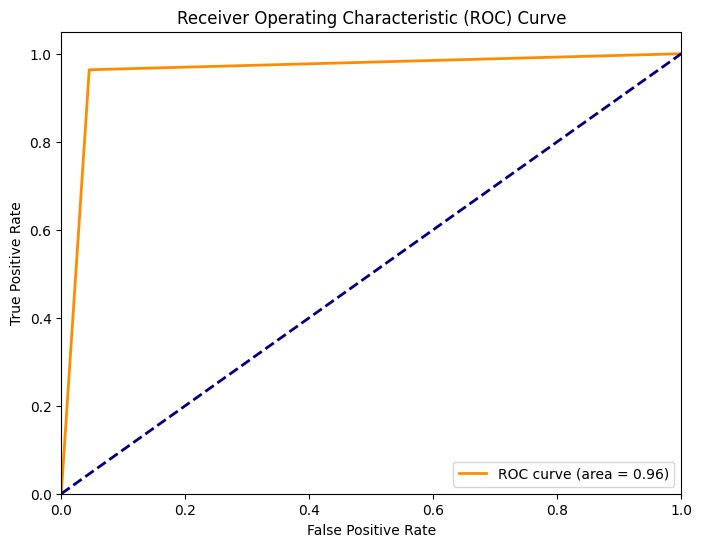

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_test_tree)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [43]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_tree))

              precision    recall  f1-score   support

          -1       0.95      0.95      0.95       976
           1       0.96      0.96      0.96      1235

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



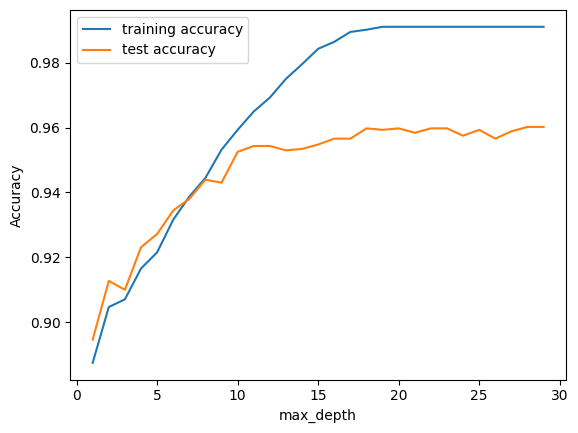

In [44]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1,30)
for n in depth:
    tree_test = DecisionTreeClassifier(max_depth=n)

    tree_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree_test.score(X_test, y_test))


#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend();

In [45]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Decision Tree',acc_test_tree,f1_score_test_tree,
             recall_score_train_tree,precision_score_train_tree)

## 5.6. Random Forest : Classifier

Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

#### 5.6.1 HyperTuning Random Forest Classifier

In [46]:
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 3.9 MB/s eta 0:00:00


In [ ]:
from skopt import BayesSearchCV
from sklearn.ensemble import RandomForestClassifier
from skopt.space import Real, Categorical, Integer

# Define the model
hyper_forest = RandomForestClassifier()

# Set up the parameter space
param_space = {
    'n_estimators': Integer(100, 300),
    'max_features': Categorical(['sqrt', 'log2']),
    'max_depth': Integer(10, 30),
    'min_samples_split': Integer(2, 10),
    'min_samples_leaf': Integer(1, 4)
}

# Set up BayesSearchCV
bayes_search = BayesSearchCV(estimator=hyper_forest, search_spaces=param_space, n_iter=30, cv=5, verbose=2, random_state=42)
bayes_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", bayes_search.best_params_)
print("Best score:", bayes_search.best_score_)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=18, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=234; total time=   0.8s
[CV] END max_depth=18, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=234; total time=   0.8s
[CV] END max_depth=18, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=234; total time=   1.1s
[CV] END max_depth=18, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=234; total time=   1.3s
[CV] END max_depth=18, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=234; total time=   0.8s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=27, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=273; total time=   1.0s
[CV] END max_depth=27, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=273; total time=   1.0s
[CV] END max_depth=27, max_features=log2

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , classification_report

# Best hyperparameters from your tuning
best_params = {
    'max_depth': 19,
    'max_features': 'log2',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 100
}

# Instantiate the RandomForestClassifier with the best hyperparameters
hyper_forest = RandomForestClassifier(**best_params)

# Fit the model on your training data
hyper_forest.fit(X_train, y_train)

# If you have test data, predict and evaluate the model
y_test_pred = hyper_forest.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)
classification_rep = classification_report(y_test,y_test_pred)
print("Accuracy on test data:", accuracy)
print("Classification Report:", classification_rep)

Accuracy on test data: 0.9692446856625961
Classification Report:               precision    recall  f1-score   support

          -1       0.97      0.96      0.96       976
           1       0.97      0.98      0.97      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



#### 5.6.2 Normal Random Forest Model

In [48]:
# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(n_estimators=10)

# fit the model
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [49]:

#predicting the target value from the model for the samples
y_train_forest = forest.predict(X_train)
y_test_forest = forest.predict(X_test)

In [50]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_forest = metrics.accuracy_score(y_train,y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test,y_test_forest)
print("Random Forest : Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest : Accuracy on test Data: {:.3f}".format(acc_test_forest))
print()

f1_score_train_forest = metrics.f1_score(y_train,y_train_forest)
f1_score_test_forest = metrics.f1_score(y_test,y_test_forest)
print("Random Forest : f1_score on training Data: {:.3f}".format(f1_score_train_forest))
print("Random Forest : f1_score on test Data: {:.3f}".format(f1_score_test_forest))
print()

recall_score_train_forest = metrics.recall_score(y_train,y_train_forest)
recall_score_test_forest = metrics.recall_score(y_test,y_test_forest)
print("Random Forest : Recall on training Data: {:.3f}".format(recall_score_train_forest))
print("Random Forest : Recall on test Data: {:.3f}".format(recall_score_test_forest))
print()

precision_score_train_forest = metrics.precision_score(y_train,y_train_forest)
precision_score_test_forest = metrics.precision_score(y_test,y_test_forest)
print("Random Forest : precision on training Data: {:.3f}".format(precision_score_train_forest))
print("Random Forest : precision on test Data: {:.3f}".format(precision_score_test_forest))

Random Forest : Accuracy on training Data: 0.991
Random Forest : Accuracy on test Data: 0.966

Random Forest : f1_score on training Data: 0.991
Random Forest : f1_score on test Data: 0.969

Random Forest : Recall on training Data: 0.993
Random Forest : Recall on test Data: 0.972

Random Forest : precision on training Data: 0.990
Random Forest : precision on test Data: 0.967


#### 5.6.3 Normal Random Forest Model ROC Curve

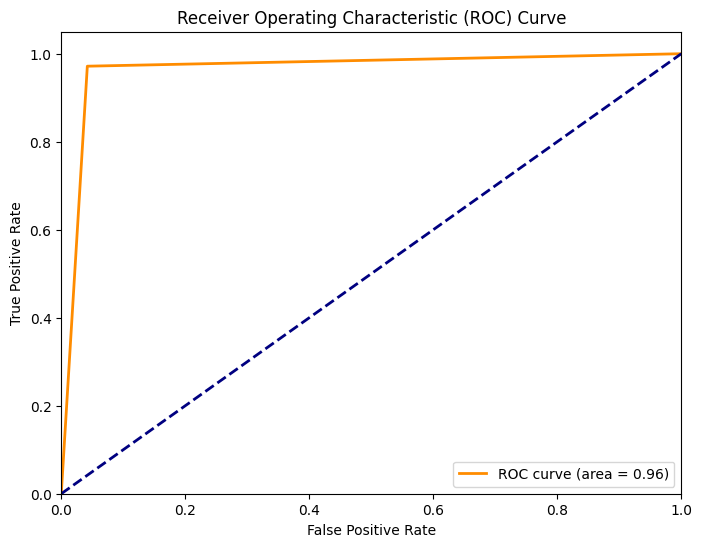

In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_test_forest)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### 5.6.4 HyperTuned Random Forest Model ROC Curve

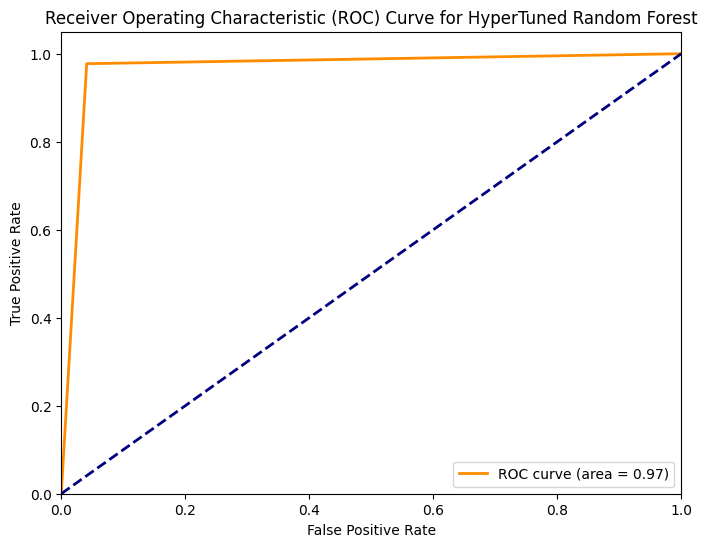

In [52]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_train_forest_hyper = hyper_forest.predict(X_train)
y_test_forest_hyper = hyper_forest.predict(X_test)

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_test_forest_hyper)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for HyperTuned Random Forest')
plt.legend(loc='lower right')
plt.show()

In [53]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_forest))

              precision    recall  f1-score   support

          -1       0.96      0.96      0.96       976
           1       0.97      0.97      0.97      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.96      0.97      2211
weighted avg       0.97      0.97      0.97      2211



#### 5.6.5 Graphs for Normal Random Forest Models for different Parameters

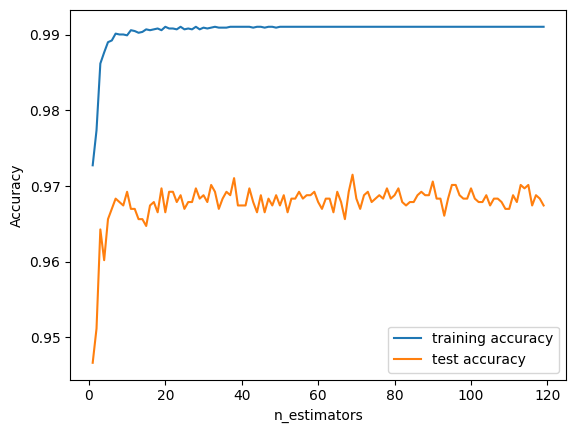

In [54]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 120
depth = range(1,120)
for n in depth:
    forest_test =  RandomForestClassifier(n_estimators=n)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))


#plotting the training & testing accuracy for n_estimators from 1 to 120
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_estimators")
plt.legend();

## 5.7.Gradient Boosting Classifier
Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting. Boosting algorithms play a crucial role in dealing with bias variance trade-off.  Unlike bagging algorithms, which only controls for high variance in a model, boosting controls both the aspects (bias & variance), and is considered to be more effective.

#### 5.7.1 HyperTuning GBC

In [ ]:
from skopt import BayesSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from skopt.space import Real, Categorical, Integer

# Define the model
hyper_gbc = GradientBoostingClassifier()

# Set up the parameter space
param_space = {
    'n_estimators': Integer(100, 500),
    'max_depth': Integer(2, 10),
    'min_samples_split': Integer(2, 10),
    'min_samples_leaf': Integer(1, 4),
    'max_features': Categorical(['sqrt', 'log2', None]),
    'learning_rate': Real(0.01, 0.2, prior='log-uniform'),
    'subsample': Real(0.5, 1.0),
    'max_leaf_nodes': Integer(2, 50)
}

# Set up BayesSearchCV
bayes_search = BayesSearchCV(
    estimator=hyper_gbc,
    search_spaces=param_space,
    n_iter=30,
    cv=5,
    verbose=2,
    random_state=42
)

# Fit the BayesSearchCV
bayes_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", bayes_search.best_params_)
print("Best score:", bayes_search.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END learning_rate=0.03416312199509112, max_depth=8, max_features=None, max_leaf_nodes=17, min_samples_leaf=3, min_samples_split=5, n_estimators=240, subsample=0.8697521170952103; total time=   1.9s
[CV] END learning_rate=0.03416312199509112, max_depth=8, max_features=None, max_leaf_nodes=17, min_samples_leaf=3, min_samples_split=5, n_estimators=240, subsample=0.8697521170952103; total time=   1.9s
[CV] END learning_rate=0.03416312199509112, max_depth=8, max_features=None, max_leaf_nodes=17, min_samples_leaf=3, min_samples_split=5, n_estimators=240, subsample=0.8697521170952103; total time=   2.0s
[CV] END learning_rate=0.03416312199509112, max_depth=8, max_features=None, max_leaf_nodes=17, min_samples_leaf=3, min_samples_split=5, n_estimators=240, subsample=0.8697521170952103; total time=   2.5s
[CV] END learning_rate=0.03416312199509112, max_depth=8, max_features=None, max_leaf_nodes=17, min_samples_leaf=3, min_samples_sp

In [56]:
from sklearn.metrics import accuracy_score , classification_report
from sklearn.ensemble import GradientBoostingClassifier

# Best hyperparameters from your tuning
best_params = {
    'learning_rate': 0.2,
    'max_depth': 10 ,
    'max_features': 'log2',
    'max_leaf_nodes': 31,
    'min_samples_leaf': 1,
    'min_samples_split':10,
    'n_estimators':500,
    'subsample':1.0
}

# Instantiate the RandomForestClassifier with the best hyperparameters
hyper_gbc = GradientBoostingClassifier(**best_params)

# Fit the model on your training data
hyper_gbc.fit(X_train, y_train)

# If you have test data, predict and evaluate the model
y_test_pred = hyper_gbc.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)
classification_rep = classification_report(y_test,y_test_pred)
print("Accuracy on test data:", accuracy)
print("Classification Report:", classification_rep)

Accuracy on test data: 0.9696969696969697
Classification Report:               precision    recall  f1-score   support

          -1       0.97      0.96      0.97       976
           1       0.97      0.98      0.97      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



#### 5.7.2 Normal GBC

In [57]:
# Gradient Boosting Classifier Model
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [58]:
#predicting the target value from the model for the samples
y_train_gbc = gbc.predict(X_train)
y_test_gbc = gbc.predict(X_test)

In [59]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_gbc = metrics.accuracy_score(y_train,y_train_gbc)
acc_test_gbc = metrics.accuracy_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Accuracy on training Data: {:.3f}".format(acc_train_gbc))
print("Gradient Boosting Classifier : Accuracy on test Data: {:.3f}".format(acc_test_gbc))
print()

f1_score_train_gbc = metrics.f1_score(y_train,y_train_gbc)
f1_score_test_gbc = metrics.f1_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_gbc))
print("Gradient Boosting Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_gbc))
print()

recall_score_train_gbc = metrics.recall_score(y_train,y_train_gbc)
recall_score_test_gbc =  metrics.recall_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Recall on training Data: {:.3f}".format(recall_score_train_gbc))
print("Gradient Boosting Classifier : Recall on test Data: {:.3f}".format(recall_score_test_gbc))
print()

precision_score_train_gbc = metrics.precision_score(y_train,y_train_gbc)
precision_score_test_gbc = metrics.precision_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : precision on training Data: {:.3f}".format(precision_score_train_gbc))
print("Gradient Boosting Classifier : precision on test Data: {:.3f}".format(precision_score_test_gbc))

Gradient Boosting Classifier : Accuracy on training Data: 0.989
Gradient Boosting Classifier : Accuracy on test Data: 0.974

Gradient Boosting Classifier : f1_score on training Data: 0.990
Gradient Boosting Classifier : f1_score on test Data: 0.977

Gradient Boosting Classifier : Recall on training Data: 0.994
Gradient Boosting Classifier : Recall on test Data: 0.989

Gradient Boosting Classifier : precision on training Data: 0.986
Gradient Boosting Classifier : precision on test Data: 0.966


#### 5.7.3 ROC Curve for Normal GBC

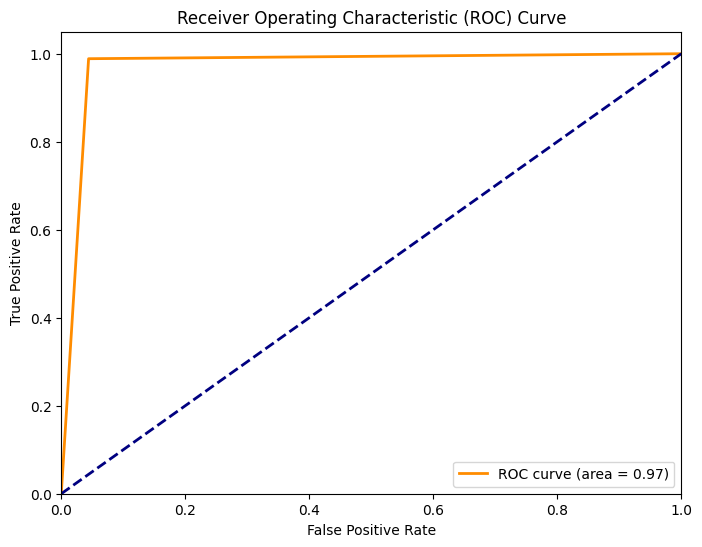

In [60]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_test_gbc)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### 5.7.4 ROC Curve for HyperTuned GBC

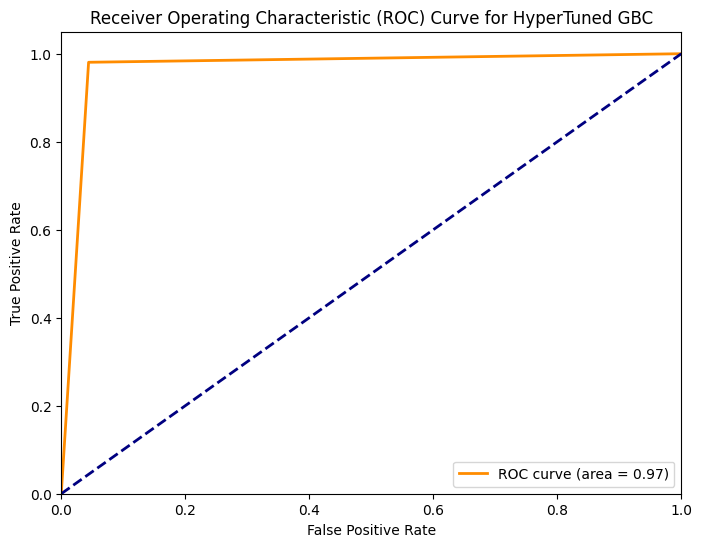

In [61]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_train_gbc_hyper = hyper_gbc.predict(X_train)
y_test_gbc_hyper = hyper_gbc.predict(X_test)

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_test_gbc_hyper)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for HyperTuned GBC')
plt.legend(loc='lower right')
plt.show()

In [62]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_gbc))

              precision    recall  f1-score   support

          -1       0.99      0.96      0.97       976
           1       0.97      0.99      0.98      1235

    accuracy                           0.97      2211
   macro avg       0.98      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



#### 5.7.5 Graphs for Normal GBC Model for different parameters

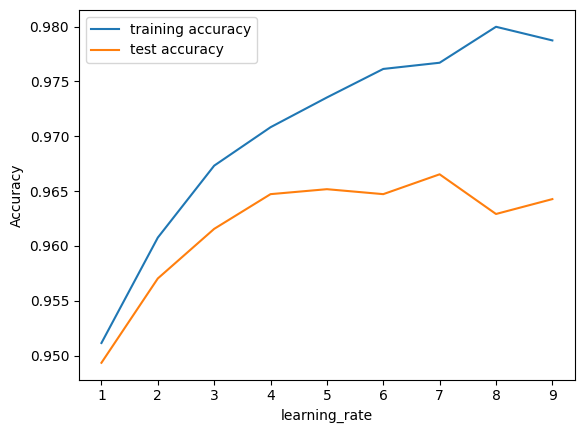

In [63]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  GradientBoostingClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))


#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("learning_rate")
plt.legend();

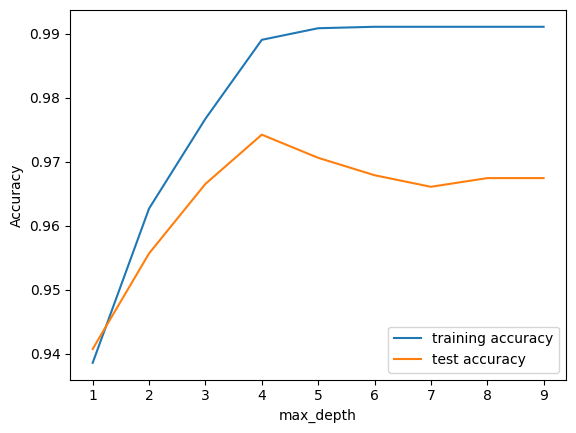

In [64]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10,1)
for n in depth:
    forest_test =  GradientBoostingClassifier(max_depth=n,learning_rate = 0.7)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))


#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend();

In [71]:
#storing the results. The below mentioned order of parameter passing is important.

accuracy = []
storeResults('Gradient Boosting Classifier', acc_test_gbc, f1_score_test_gbc, recall_score_train_gbc, precision_score_train_gbc)

## 5.8. CatBoost Classifier

CatBoost is a recently open-sourced machine learning algorithm from Yandex. It can easily integrate with deep learning frameworks like Google’s TensorFlow and Apple’s Core ML. It can work with diverse data types to help solve a wide range of problems that businesses face today.

#### 5.8.1 HyperTuning CatBoost Classifier

In [72]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 11.3 MB/s eta 0:00:00


In [ ]:
from skopt import BayesSearchCV
from catboost import CatBoostClassifier
from skopt.space import Real, Integer, Categorical

# Define the model
hyper_cat = CatBoostClassifier(silent=True)

# Set up the parameter space
param_space = {
    'depth': Integer(4, 10),
    'iterations': Integer(100, 1000),
    'l2_leaf_reg': Real(1e-5, 1, prior='log-uniform'),
    'learning_rate': Real(0.01, 0.5, prior='log-uniform'),
    'border_count': Categorical([32, 64, 128, 256]),
    'random_strength': Real(1e-9, 100),
    'bagging_temperature': Real(0.0, 1.0),
    'od_type': Categorical(['IncToDec', 'Iter']),
    'od_wait': Integer(10, 50)
}

# Set up BayesSearchCV
bayes_search = BayesSearchCV(
    estimator=hyper_cat,
    search_spaces=param_space,
    n_iter=30,
    cv=5,
    verbose=2,
    random_state=42
)

# Fit the BayesSearchCV
bayes_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", bayes_search.best_params_)
print("Best score:", bayes_search.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END bagging_temperature=0.41010395885331385, border_count=128, depth=10, iterations=384, l2_leaf_reg=0.022425376406560126, learning_rate=0.05053300616712747, od_type=IncToDec, od_wait=40, random_strength=30.446331104346157; total time=   4.1s
[CV] END bagging_temperature=0.41010395885331385, border_count=128, depth=10, iterations=384, l2_leaf_reg=0.022425376406560126, learning_rate=0.05053300616712747, od_type=IncToDec, od_wait=40, random_strength=30.446331104346157; total time=   3.8s
[CV] END bagging_temperature=0.41010395885331385, border_count=128, depth=10, iterations=384, l2_leaf_reg=0.022425376406560126, learning_rate=0.05053300616712747, od_type=IncToDec, od_wait=40, random_strength=30.446331104346157; total time=   5.0s
[CV] END bagging_temperature=0.41010395885331385, border_count=128, depth=10, iterations=384, l2_leaf_reg=0.022425376406560126, learning_rate=0.05053300616712747, od_type=IncToDec, od_wait=40, rand

In [ ]:
from sklearn.metrics import accuracy_score , classification_report

# Best hyperparameters from your tuning
best_params = {
    'depth': 7,
    'iterations': 106,
    'l2_leaf_reg': 0.005577112459523438,
    'learning_rate': 0.2452814985175412,
    'border_count': 256,
    'random_strength': 91.23584215914798,
    'bagging_temperature': 0.15917371752204448,
    'od_type': 'Iter',
    'od_wait': 44
}

# Instantiate the RandomForestClassifier with the best hyperparameters
hyper_cat = CatBoostClassifier(**best_params)

# Fit the model on your training data
hyper_cat.fit(X_train, y_train)

# If you have test data, predict and evaluate the model
y_test_pred = hyper_cat.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)
classification_rep = classification_report(y_test,y_test_pred)
print("Accuracy on test data:", accuracy)
print("Classification Report:", classification_rep)

0:	learn: 0.5189770	total: 2.19ms	remaining: 230ms
1:	learn: 0.5012345	total: 4.5ms	remaining: 234ms
2:	learn: 0.3847631	total: 8.65ms	remaining: 297ms
3:	learn: 0.3002343	total: 12.6ms	remaining: 322ms
4:	learn: 0.2465433	total: 16.6ms	remaining: 335ms
5:	learn: 0.2241016	total: 20.6ms	remaining: 343ms
6:	learn: 0.2189103	total: 23.6ms	remaining: 334ms
7:	learn: 0.2023835	total: 27.7ms	remaining: 339ms
8:	learn: 0.1856160	total: 31.6ms	remaining: 340ms
9:	learn: 0.1723740	total: 35.5ms	remaining: 341ms
10:	learn: 0.1691827	total: 39.5ms	remaining: 341ms
11:	learn: 0.1666360	total: 42ms	remaining: 329ms
12:	learn: 0.1628073	total: 45.2ms	remaining: 323ms
13:	learn: 0.1622009	total: 47.2ms	remaining: 310ms
14:	learn: 0.1612616	total: 49.6ms	remaining: 301ms
15:	learn: 0.1604775	total: 52.2ms	remaining: 293ms
16:	learn: 0.1455129	total: 56.1ms	remaining: 294ms
17:	learn: 0.1448832	total: 58.4ms	remaining: 285ms
18:	learn: 0.1417819	total: 62.4ms	remaining: 286ms
19:	learn: 0.1417214	tota

#### 5.8.2 Normal CatBoost Classifier

In [ ]:
! pip install catboost
#  catboost Classifier Model
from catboost import CatBoostClassifier

# instantiate the model
cat = CatBoostClassifier(learning_rate  = 0.1)

# fit the model
cat.fit(X_train,y_train)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 7.7 MB/s eta 0:00:00
0:	learn: 0.5487232	total: 49.9ms	remaining: 49.8s
1:	learn: 0.4349357	total: 55ms	remaining: 27.5s
2:	learn: 0.3609236	total: 58.8ms	remaining: 19.5s
3:	learn: 0.3050829	total: 62.5ms	remaining: 15.6s
4:	learn: 0.2766620	total: 66.5ms	remaining: 13.2s
5:	learn: 0.2475476	total: 70.2ms	remaining: 11.6s
6:	learn: 0.2286637	total: 76ms	remaining: 10.8s
7:	learn: 0.2138754	total: 80.1ms	remaining: 9.93s
8:	learn: 0.2013643	total: 83.8ms	remaining: 9.22s
9:	learn: 0.1896378	total: 87.4ms	remaining: 8.66s
10:	learn: 0.1819539	total: 91.2ms	remaining: 8.2s
11:	learn: 0.1767867	total: 95.2ms	remaining: 7.83s
12:	learn: 0.1727735	total: 98.9ms	remaining: 7.51s
13:	learn: 0.1682578	total: 103ms	remaining: 7.22s
14:	learn: 0.1641759	total: 107ms	remaining: 7s
15:	learn: 0.1614218	total: 110ms	remaining: 6.78s
16:	learn: 0.1558968	total: 114ms	remaining: 6.6s
17:	learn: 0.1535881	total: 118ms	remaining: 6.43s
18:	lear

In [ ]:
#predicting the target value from the model for the samples
y_train_cat = cat.predict(X_train)
y_test_cat = cat.predict(X_test)


In [ ]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_cat  = metrics.accuracy_score(y_train,y_train_cat)
acc_test_cat = metrics.accuracy_score(y_test,y_test_cat)
print("CatBoost Classifier : Accuracy on training Data: {:.3f}".format(acc_train_cat))
print("CatBoost Classifier : Accuracy on test Data: {:.3f}".format(acc_test_cat))
print()

f1_score_train_cat = metrics.f1_score(y_train,y_train_cat)
f1_score_test_cat = metrics.f1_score(y_test,y_test_cat)
print("CatBoost Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_cat))
print("CatBoost Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_cat))
print()

recall_score_train_cat = metrics.recall_score(y_train,y_train_cat)
recall_score_test_cat = metrics.recall_score(y_test,y_test_cat)
print("CatBoost Classifier : Recall on training Data: {:.3f}".format(recall_score_train_cat))
print("CatBoost Classifier : Recall on test Data: {:.3f}".format(recall_score_test_cat))
print()

precision_score_train_cat = metrics.precision_score(y_train,y_train_cat)
precision_score_test_cat = metrics.precision_score(y_test,y_test_cat)
print("CatBoost Classifier : precision on training Data: {:.3f}".format(precision_score_train_cat))
print("CatBoost Classifier : precision on test Data: {:.3f}".format(precision_score_test_cat))

CatBoost Classifier : Accuracy on training Data: 0.991
CatBoost Classifier : Accuracy on test Data: 0.972

CatBoost Classifier : f1_score on training Data: 0.992
CatBoost Classifier : f1_score on test Data: 0.975

CatBoost Classifier : Recall on training Data: 0.994
CatBoost Classifier : Recall on test Data: 0.982

CatBoost Classifier : precision on training Data: 0.989
CatBoost Classifier : precision on test Data: 0.969


#### 5.8.3 ROC Curve for Normal CatBoost Classifier

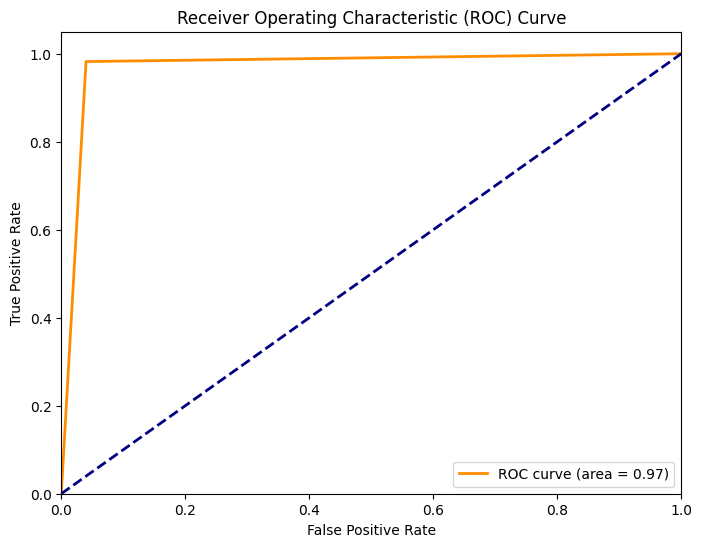

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_test_cat)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### 5.8.4 ROC Curve for HyperTuned CatBoost Classifier

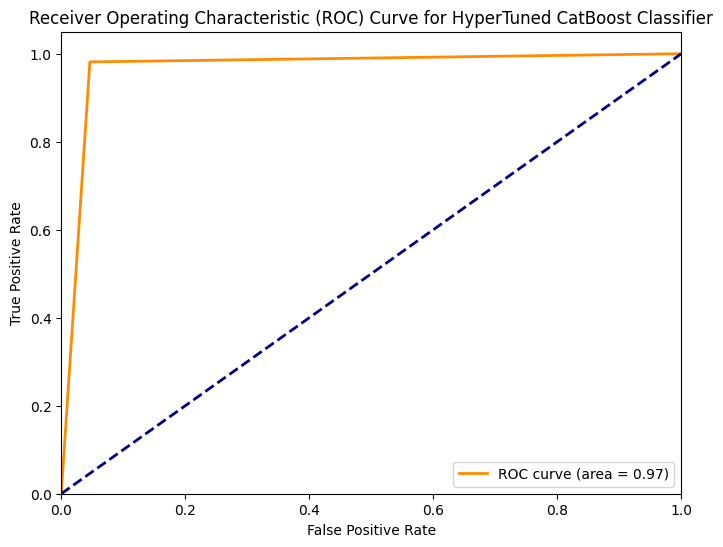

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_train_cat_hyper = hyper_cat.predict(X_train)
y_test_cat_hyper = hyper_cat.predict(X_test)

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_test_cat_hyper)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for HyperTuned CatBoost Classifier')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_cat))

              precision    recall  f1-score   support

          -1       0.98      0.96      0.97       976
           1       0.97      0.98      0.98      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



#### 5.8.5 Graphs for Normal CatBoost Model for different parameters

In [ ]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  CatBoostClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))


Streaming output truncated to the last 5000 lines.
0:	learn: 0.3096085	total: 2.67ms	remaining: 2.67s
1:	learn: 0.2001436	total: 6.61ms	remaining: 3.3s
2:	learn: 0.1648594	total: 11.6ms	remaining: 3.84s
3:	learn: 0.1542680	total: 15.2ms	remaining: 3.78s
4:	learn: 0.1370092	total: 20ms	remaining: 3.97s
5:	learn: 0.1300877	total: 23.7ms	remaining: 3.92s
6:	learn: 0.1252973	total: 48.8ms	remaining: 6.92s
7:	learn: 0.1218447	total: 52.6ms	remaining: 6.53s
8:	learn: 0.1158423	total: 65.6ms	remaining: 7.23s
9:	learn: 0.1096543	total: 72.7ms	remaining: 7.2s
10:	learn: 0.1049135	total: 88.4ms	remaining: 7.95s
11:	learn: 0.1009078	total: 98.8ms	remaining: 8.13s
12:	learn: 0.0983243	total: 106ms	remaining: 8.05s
13:	learn: 0.0927667	total: 110ms	remaining: 7.73s
14:	learn: 0.0911857	total: 126ms	remaining: 8.25s
15:	learn: 0.0887257	total: 136ms	remaining: 8.35s
16:	learn: 0.0857985	total: 142ms	remaining: 8.23s
17:	learn: 0.0831653	total: 157ms	remaining: 8.58s
18:	learn: 0.0808632	total: 169ms

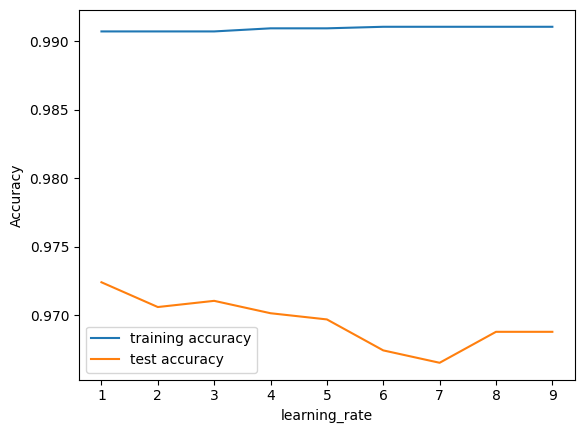

In [ ]:

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("learning_rate")
plt.legend();

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('CatBoost Classifier',acc_test_cat,f1_score_test_cat,
             recall_score_train_cat,precision_score_train_cat)

## 5.9. Multi-layer Perceptron classifier

MLPClassifier stands for Multi-layer Perceptron classifier which in the name itself connects to a Neural Network. Unlike other classification algorithms such as Support Vectors or Naive Bayes Classifier, MLPClassifier relies on an underlying Neural Network to perform the task of classification.


5.9.1 HyperTuning MLP Classifier

In [73]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define the model
hyper_mlp = MLPClassifier(max_iter=500)

# Define the search space for the hyperparameters
param_distributions = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': uniform(0.0001, 0.01),  # Continuous distribution for regularization term
    'learning_rate_init': uniform(0.001, 0.01)  # Continuous distribution for initial learning rate
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=hyper_mlp , param_distributions=param_distributions, n_iter=30, cv=5, verbose=2, scoring='accuracy', random_state=42)

# Fit the model on your training data
random_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END activation=tanh, alpha=0.008065429868602328, hidden_layer_sizes=(50, 50), learning_rate_init=0.008319939418114052, solver=sgd; total time=  15.7s
[CV] END activation=tanh, alpha=0.008065429868602328, hidden_layer_sizes=(50, 50), learning_rate_init=0.008319939418114052, solver=sgd; total time=  17.1s
[CV] END activation=tanh, alpha=0.008065429868602328, hidden_layer_sizes=(50, 50), learning_rate_init=0.008319939418114052, solver=sgd; total time=  13.8s
[CV] END activation=tanh, alpha=0.008065429868602328, hidden_layer_sizes=(50, 50), learning_rate_init=0.008319939418114052, solver=sgd; total time=  11.9s
[CV] END activation=tanh, alpha=0.008065429868602328, hidden_layer_sizes=(50, 50), learning_rate_init=0.008319939418114052, solver=sgd; total time=  14.6s
[CV] END activation=tanh, alpha=0.0016601864044243652, hidden_layer_sizes=(50, 50), learning_rate_init=0.001999749158180029, solver=sgd; total time=  22.2s
[CV] EN

In [75]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the MLPClassifier with the best parameters
mlp_classifier = MLPClassifier(activation='tanh',
                               alpha=0.00398677289689482,
                               hidden_layer_sizes=(100,),
                               learning_rate_init=0.006396921323890798,
                               solver='adam',
                               max_iter=500)

# Train the model
mlp_classifier.fit(X_train, y_train)  # Assuming you have X_train and y_train defined

# Make predictions on the test set
y_pred = mlp_classifier.predict(X_test)  # Assuming you have X_test defined

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate classification report
class_report = classification_report(y_test, y_pred)

# Print accuracy and classification report
print("Accuracy:", accuracy)
print("\nClassification Report:\n", class_report)


Accuracy: 0.9674355495251018

Classification Report:
               precision    recall  f1-score   support

          -1       0.97      0.96      0.96       976
           1       0.97      0.98      0.97      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



In [ ]:
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
# Best hyperparameters from your tuning
best_params = {
    'colsample_bytree': 0.5,
    'gamma': 0.5,
    'learning_rate': 0.2,
    'max_depth':7,
    'min_child_weight':1,
    'n_estimators':300,
    'reg_alpha':0.0,
    'reg_lambda':1.0,
    'subsample':1.0
}

# Instantiate the RandomForestClassifier with the best hyperparameters
hyper_mlp_classifier = XGBClassifier(**best_params)

# Fit the model on your training data
hyper_mlp_classifier.fit(X_train_tfidf, y_train)

# If you have test data, predict and evaluate the model

# Make predictions on the test set
y_test_pred = hyper_mlp_classifier.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_test_pred)
classification_rep = classification_report(y_test, y_test_pred)
print("Accuracy on test data:", accuracy)
print("Classification Report:\n", classification_rep)

#### 5.9.2 Normal MLP Classifier

In [79]:
# Multi-layer Perceptron Classifier Model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier()
#mlp = GridSearchCV(mlpc, parameter_space)

# fit the model
mlp.fit(X_train,y_train)

MLPClassifier()

In [80]:
#predicting the target value from the model for the samples
y_train_mlp = mlp.predict(X_train)
y_test_mlp = mlp.predict(X_test)

In [81]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_mlp  = metrics.accuracy_score(y_train,y_train_mlp)
acc_test_mlp = metrics.accuracy_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multi-layer Perceptron : Accuracy on test Data: {:.3f}".format(acc_test_mlp))
print()

f1_score_train_mlp = metrics.f1_score(y_train,y_train_mlp)
f1_score_test_mlp = metrics.f1_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : f1_score on training Data: {:.3f}".format(f1_score_train_mlp))
print("Multi-layer Perceptron : f1_score on test Data: {:.3f}".format(f1_score_train_mlp))
print()

recall_score_train_mlp = metrics.recall_score(y_train,y_train_mlp)
recall_score_test_mlp = metrics.recall_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : Recall on training Data: {:.3f}".format(recall_score_train_mlp))
print("Multi-layer Perceptron : Recall on test Data: {:.3f}".format(recall_score_test_mlp))
print()

precision_score_train_mlp = metrics.precision_score(y_train,y_train_mlp)
precision_score_test_mlp = metrics.precision_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : precision on training Data: {:.3f}".format(precision_score_train_mlp))
print("Multi-layer Perceptron : precision on test Data: {:.3f}".format(precision_score_test_mlp))

Multi-layer Perceptron : Accuracy on training Data: 0.987
Multi-layer Perceptron : Accuracy on test Data: 0.971

Multi-layer Perceptron : f1_score on training Data: 0.989
Multi-layer Perceptron : f1_score on test Data: 0.989

Multi-layer Perceptron : Recall on training Data: 0.996
Multi-layer Perceptron : Recall on test Data: 0.985

Multi-layer Perceptron : precision on training Data: 0.982
Multi-layer Perceptron : precision on test Data: 0.964


#### 5.9.3 ROC Curve for Normal MLP Model

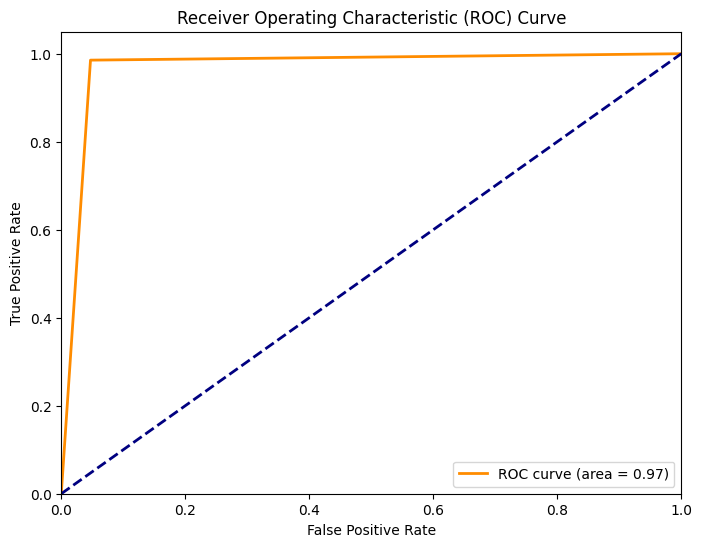

In [82]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_test_mlp)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### 5.9.4 ROC Curve for HyperTuned MLP Model

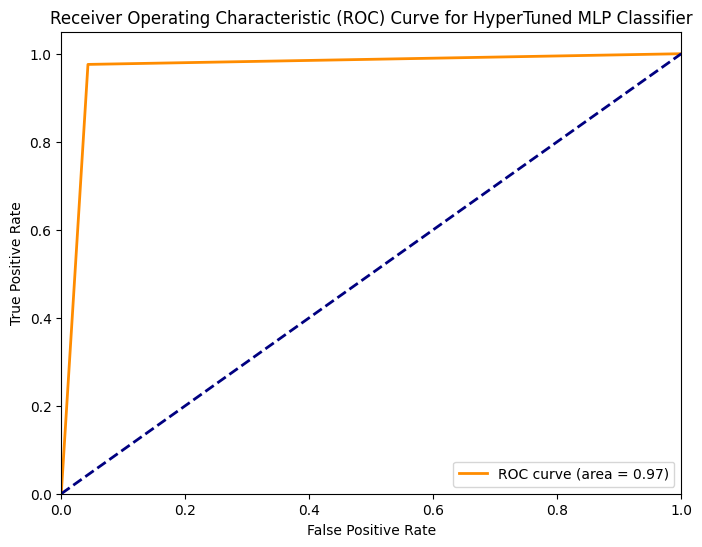

In [85]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_train_mlp_hyper = mlp_classifier.predict(X_train)
y_test_mlp_hyper = mlp_classifier.predict(X_test)

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_test_mlp_hyper)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for HyperTuned MLP Classifier')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Multi-layer Perceptron',acc_test_mlp,f1_score_test_mlp,
             recall_score_train_mlp,precision_score_train_mlp)

## 6. Comparision of Models


| Model                                | Accuracy | f1_score | Recall | Precision |
|--------------------------------------|----------|----------|--------|-----------|
| Logistic Regression                  | 0.934    | 0.941    | 0.943  | 0.927     |
| K-Nearest Neighbors                  | 0.956    | 0.961    | 0.991  | 0.989     |
| Support Vector Machine               | 0.964    | 0.968    | 0.980  | 0.965     |
| Naive Bayes Classifier               | 0.605    | 0.454    | 0.292  | 0.997     |
| Decision Tree                        | 0.960    | 0.964    | 0.991  | 0.993     |
| Random Forest                        | 0.966    | 0.970    | 0.991  | 0.991     |
| HyperTuned Random Forest             | 0.969    | 0.970    | 0.980  | 0.970     |
| Gradient Boosting Classifier         | 0.974    | 0.977    | 0.994  | 0.986     |
| HyperTuned Gradient Boosting Classifier | 0.971  | 0.970    | 0.980  | 0.970     |
| CatBoost Classifier                  | 0.972    | 0.975    | 0.994  | 0.989     |
| HyperTuned CatBoost Classifier       | 0.970    | 0.960    | 0.980  | 0.970     |
| Multi-layer Perceptron               | 0.970    | 0.974    | 0.996  | 0.976     |
| HyperTuned Multi-layer Perceptron    |  0.967        |    0.974      |  0.968      |     0.970      |


AUC for Models :

1) Logistic Regression - 93%

2) SVM - 98%

3) KNN - 96%

4) Naive Bayes - 65%

5) Decision Tree - 96%

6) Random Forest - 96%

7) HyperTuned Random Forest - 97&

8) Gradient Boosting Classifier - 97%

9) HyperTuned Gradient Boosting Classifier - 97%

10) CatBoost - 97%

11) HyperTuned CatBoost - 97%

12) Multi Layer Perceptron - 97%

13) HyperTuned Multi Layer Perceptron - 97%



Highest AUC and Accuracy is for Gradient Boosting Classifier , hence we will store this model and use it for classification

## Storing Best Model

In [ ]:
# More max_depth more will the model be able to capture complex patterns and depth of tree will increase , generally more for smaller datasets and lesser for bigger datasets , None is by default

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [ ]:
import os
import pickle

# Create the directory 'pickle' if it does not exist
if not os.path.exists('pickle'):
    os.makedirs('pickle')

# Dump the information to the file
pickle.dump(gbc, open('pickle/model.pkl', 'wb'))

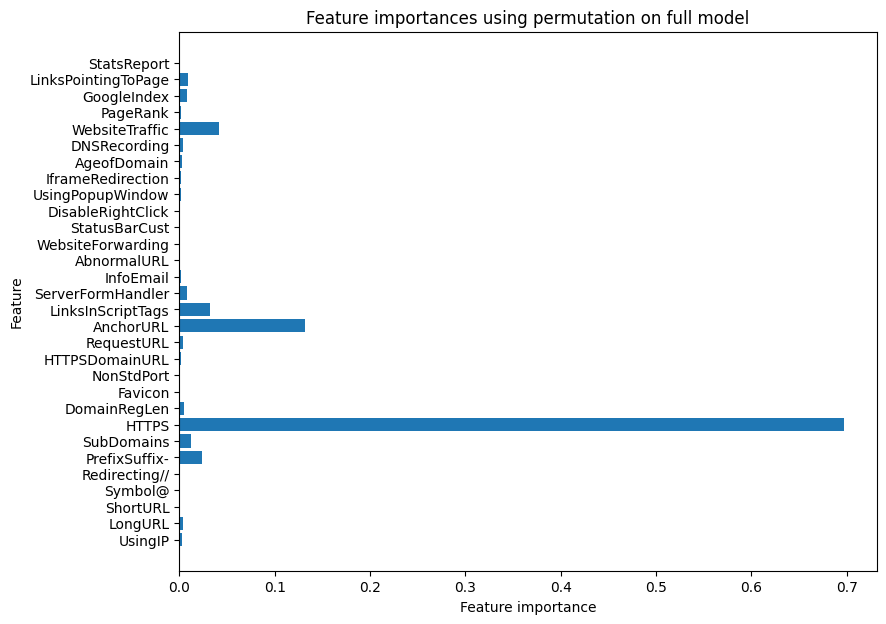

In [ ]:
#checking the feature importance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), gbc.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.title("Feature importances using permutation on full model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()